# Salary prediction

This is very very simple project, that i need just for comparing training set and test set. The code doesn't have something special, because almost all was taken from documentation and just need me for practice with R.

Here we use simple linear regression.

In [12]:
#import libraries
library(caTools)
library(ggplot2)

In [13]:
#read csv file and check head
salary = read.csv('Salary_Data.csv')
head(salary)

YearsExperience,Salary
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642


In [7]:
#splitting data into training set and test set
set.seed(123)
split = sample.split(salary$Salary, SplitRatio = 2/3)
training_set = subset(salary, split == TRUE)
test_set = subset(salary, split == FALSE)

In [8]:
#Fitting simple linear regression to the training set
regressor = lm(formula = Salary ~ YearsExperience, data=training_set)
summary(regressor)


Call:
lm(formula = Salary ~ YearsExperience, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7325.1 -3814.4   427.7  3559.7  8884.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25592       2646   9.672 1.49e-08 ***
YearsExperience     9365        421  22.245 1.52e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5391 on 18 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.963 
F-statistic: 494.8 on 1 and 18 DF,  p-value: 1.524e-14


In [9]:
salary_predict = predict(regressor, test_set)
salary_training_set_predict = predict(regressor, training_set)

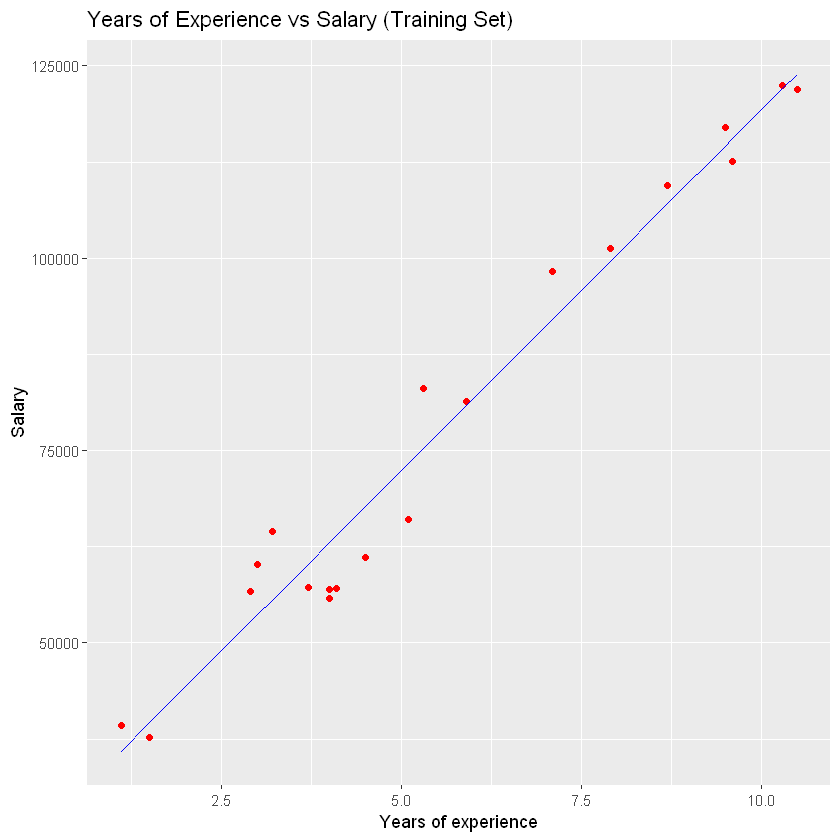

In [10]:
#Training set data plot
ggplot() + 
  geom_point(aes(x=training_set$YearsExperience, y=training_set$Salary), color='red') +
  geom_line(aes(x=training_set$YearsExperience, y=salary_training_set_predict), color='blue') + 
  ggtitle('Years of Experience vs Salary (Training Set)') + 
  xlab('Years of experience') +
  ylab('Salary')

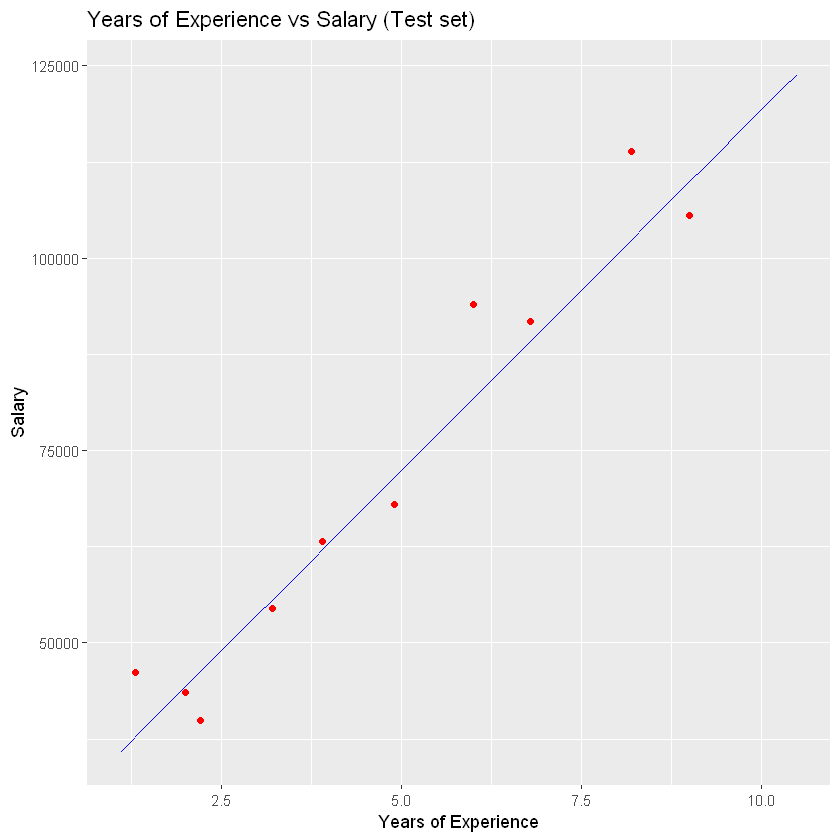

In [11]:
#Test set data plot
ggplot() + 
  geom_point(aes(x=test_set$YearsExperience, y=test_set$Salary), color='red') + 
  geom_line(aes(x=training_set$YearsExperience, y=salary_training_set_predict), color='blue') +
  ggtitle('Years of Experience vs Salary (Test set)') +
  xlab('Years of Experience') +
  ylab('Salary')